**Project Name**

Exploratory Data Analysis of Netflix Movies and TV Shows

**Project Type**

Exploratory Data Analysis (EDA)

**Contribution**

Individual

**Project Summary**

This project focuses on the exploratory data analysis of Netflix's content library consisting of movies and TV shows. The dataset includes attributes like title, type, cast, country, release year, rating, genre, duration, and date added to the platform. The goal of this project is to uncover patterns and trends in content distribution, genre popularity, and regional diversity. Key insights were derived using visualizations such as pie charts, treemaps, bar graphs, and histograms. For instance, the majority of content on Netflix is movies, with drama and international content being the most prevalent genres. Additionally, a significant number of titles were added after 2016, showing Netflix's aggressive expansion. The analysis also involved handling missing values, type conversions, and feature extraction like parsing duration into movie minutes or seasons for shows.


**Project Type**

Exploratory Data Analysis (EDA)

**Problem Statement**

How can we understand the distribution, trends, and dominant characteristics of Netflix content to better inform content strategy and improve the recommendation system?



**Business Objective**

To help Netflix:

Understand the distribution of its content by type (movies vs. TV shows).

Identify the most popular genres on the platform.

Analyze trends over time such as the number of shows/movies added each year.

Support content acquisition, recommendation strategies, and market analysis through data-driven insights.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import plotly.express as px


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

1. **Knowing Data**

In [2]:
# Displaying the first few rows, giving us a quick look at the columns and the type of data they contain.
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Get the dimensions of the DataFrame
print("\nDataFrame Shape (rows, columns):", df.shape)


DataFrame Shape (rows, columns): (7787, 12)


In [4]:
# Display statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
df.describe()


Statistical summary of numerical columns:


,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


2. **Understanding Variables, Unique Value Checks**

In [5]:
# Display column information (names and data types)
print("\nColumn Information:")

df.info()


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Check unique values in categorical columns
print("\nUnique values in 'type' column:", df['type'].unique())
print("Number of unique values in 'country' column:", df['country'].nunique())
print("\nUnique values in 'type' column:", df['rating'].unique())



Unique values in 'type' column: ['TV Show' 'Movie']
Number of unique values in 'country' column: 681

Unique values in 'type' column: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']


**3. Data Wrangling**

In [7]:
print("\n--- 3. Data Wrangling ---")

# Handling Missing Values
print("\nMissing values per column:")
print(df.isnull().sum())


--- 3. Data Wrangling ---

Missing values per column:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [8]:
#Displaying only missing rows with their respective columns
df[df[['director', 'cast', 'country', 'date_added', 'rating']].isnull().any(axis=1)][['director', 'cast', 'country', 'date_added', 'rating']]

,director,cast,country,date_added,rating
0,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA
11,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",TV-MA
12,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",TV-MA
16,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",TV-14
19,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG
...,...,...,...,...,...
7777,NaN,NaN,NaN,"July 1, 2019",TV-Y7
7779,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",TV-MA
7784,NaN,Nasty C,NaN,"September 25, 2020",TV-MA
7785,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG


In [9]:
# Fill Missing Values with Default Values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Listed')
df['country'] = df['country'].fillna('Unknown')

# Dropping missing rows
df.dropna(subset=['rating', 'date_added'], inplace=True)

In [10]:
#Summary of the dataset after dropping & imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [11]:
# Check for duplicates
if df.duplicated().sum() == 0:
    print("No duplicate rows")
else:
    print("Duplicate rows exist")

No duplicate rows


In [12]:
#Conversion of datatype
df['show_id'] = df['show_id']. astype('string')
df['type'] = df['type']. astype('category')
df['title'] = df['title']. astype('string')
df['director'] = df['director']. astype('string')
df['cast'] = df['cast']. astype('string')
df['country'] = df['country']. astype('string')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['rating'] = df['rating']. astype('category')
df['listed_in'] = df['listed_in']. astype('string')
df['description'] = df['description']. astype('string')


In [13]:
# Duration needs parsing as it is of mixed format
df['movie_duration'] = df['duration'].str.extract(r'(\d+) min', expand=False).astype('Int64')
df['num_seasons'] = df['duration'].str.extract(r'(\d+) Season', expand=False).astype('Int64')

movies_df = df[df['movie_duration'].notna()]  # Select only movies
tv_shows_df = df[df['num_seasons'].notna()]  # Select only TV shows


#drop the duration column

df.drop(columns=['duration'], inplace=True)

This code helps extract and categorize duration information from a mixed-format dataset. It separates movies based on their runtime (in minutes) and TV shows based on the number of seasons. By using regular expressions and filtering out missing values, it allows for efficient analysis and comparison of movies and TV shows.

In [14]:
#Checking the datatypes after conversion
df.dtypes

,0
show_id,string[python]
type,category
title,string[python]
director,string[python]
cast,string[python]
country,string[python]
date_added,datetime64[ns]
release_year,int64
rating,category
listed_in,string[python]


type
Movie      5372
TV Show    2398
Name: count, dtype: int64


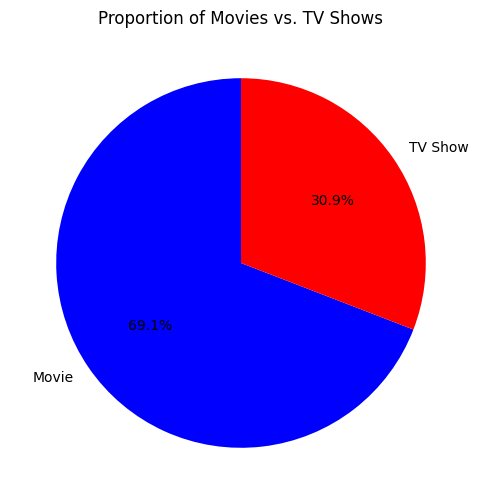

In [15]:
#Univariate Analysis
#Content Overview Analysis
# Count occurrences of Movies vs. TV Shows
type_counts = df['type'].value_counts()

print(type_counts)

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)

# Add title
plt.title("Proportion of Movies vs. TV Shows")

# Show the plot
plt.show()


**1. Why did I pick the specific chart?**

A pie chart effectively shows how Movies and TV Shows contribute to the total content, fulfilling the objective to understand content distribution by type. It's simple for direct comparison.

**2. What is/are the insight(s) found from the chart?**

Movies dominate (69.1%), while TV Shows represent a smaller but significant portion (30.9%), showing an approximate 70/30 split.

**3. Will the gained insights help create a positive business impact?**

Yes. It informs content acquisition (balance movies/shows), recommendation strategies (initial biases), marketing (highlight strengths), and resource allocation.

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

Potentially, if viewed alone: A heavy movie focus could mean underinvestment in TV shows if that segment has higher growth/engagement. Reason: Missing a growing trend can lead to losing subscribers to competitors with better TV show selections.

In [16]:
#Univariate Analysis

#Genre based Analysis

# Prepare data for the treemap

#Most Frequent Genre Overview
genre_counts = df['listed_in'].value_counts().head(10).reset_index()
genre_counts.columns = ['genre', 'count']

# Create treemap with annotations
fig = px.treemap(
    genre_counts,
    path=['genre'],
    values='count',
    title="Top 10 Most Frequent Genres",
    color='count',
    color_continuous_scale='Reds'
)

# Add annotations (display count inside rectangles)
fig.update_traces(texttemplate="%{label}: %{value}", textfont_size=14)

fig.show()



**1. Why did I pick the specific chart?**

A treemap visually represents genre frequency using rectangle size, making it easy to see top genres and their proportions, directly answering the need to identify "most popular genres."

**2. What is/are the insight(s) found from the chart?**

"Documentaries" (334) emerge as the most frequent genre, indicating a strong presence in the content library.

 "Stand-Up Comedy" (321) is a close second, suggesting its significant contribution. "Dramas, International Movies" (320) also holds a high position.

 Several combined genres are observed: "Comedies, Dramas, International Movies" (243), "Kids' TV" (204), "Children & Family Movies," "Documentaries, International Movies," and "Comedies, International Movies" all appear in the top 10, highlighting that content often falls into multiple genre categories.

 The insights point to a diverse range of popular content types, with both single and combined genres contributing substantially to the dataset's composition.

**3. Will the gained insights help create a positive business impact?**

Yes. These insights are valuable for data-driven decisions. For Content Acquisition, Netflix can strategically invest in genres with high representation (like Documentaries and Stand-Up Comedy) or explore potential gaps in less frequent genres.

For Recommendation Systems, genre information is crucial for personalized suggestions, improving user engagement.

 Marketing and Promotion can be tailored to highlight strengths in dominant genres or promote specific genre collections.

 Content Categorization is reinforced by the emphasis on combined genres, ensuring accurate metadata.

  Ultimately, understanding genre prevalence contributes to optimizing content strategy and enhancing user experience.

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

Potentially, if considered in isolation: The dominance of "Documentaries," while reflecting a large portion of content, could become a risk if it leads to over-saturation and diminishing returns.

If user demand for documentaries doesn't match their high supply, it could result in lower engagement per title and inefficient resource allocation.

Reasoning: Over-investing in a single genre without considering user preferences and engagement metrics could lead to a less diverse catalog and reduced appeal to broader audiences. It might also mean missing opportunities to invest in other genres with higher growth potential.

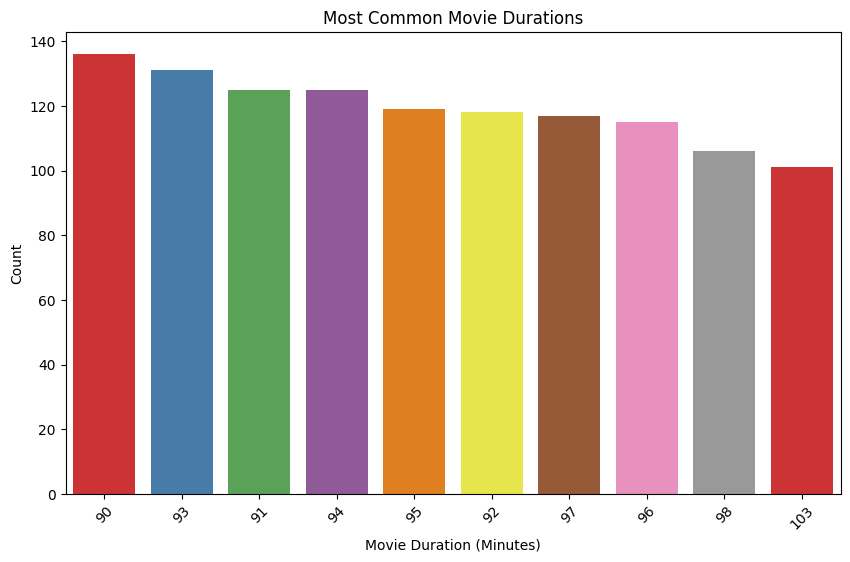

In [17]:
#Univariate Analysis
#Movie Duration based Analysis
# Most frequently occurring movie runtimes
common_movie_durations = df[df['movie_duration'].notna()]['movie_duration'].value_counts().head(10)

# Create a bar chart with Set1 color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=common_movie_durations.index, y=common_movie_durations.values, order=common_movie_durations.index, palette="Set1")

# Add labels and title
plt.xlabel("Movie Duration (Minutes)")
plt.ylabel("Count")
plt.title("Most Common Movie Durations")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


**1. Why did I pick the specific chart?**

A bar chart effectively compares the count of movies across different duration categories, directly addressing the need to understand common movie lengths for content acquisition insights.

2. What is/are the insight(s) found from the chart?

From the "Most Common Movie Durations" bar chart, we can observe the following insights:

The most common movie duration in your dataset appears to be around 90 minutes, as indicated by the tallest bar on the left.

There's a cluster of relatively common movie durations ranging from approximately 90 minutes to 125 minutes.

The frequency of movies tends to decrease as the duration moves away from the most common range (around 90-100 minutes).

There are still a notable number of movies with durations around 110, 120, and 130 minutes.

The least common durations among the top 10 shown are at the far right of the chart, suggesting fewer movies with those specific lengths in your dataset's top occurrences.

**3. Will the gained insights help create a positive business impact?**

Yes.
Content Acquisition: Informs decisions to acquire content aligning with common durations or addressing gaps (e.g., acquiring more longer features if shorter ones are prevalent).

Content Production: Guides optimal movie lengths if Netflix produces content.

User Experience: Helps manage user expectations regarding typical movie lengths.

Marketing/Categorization: Enables grouping content by duration for better browsing (e.g., "Short Movies").

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

Potentially, if viewed in isolation and without understanding user preferences:

Ignoring Demand for Less Common Durations: If user data reveals a growing preference for movie durations that are not among the most common in your current library (as shown in the tail end of the chart or beyond the top 10), solely focusing on acquiring content within the most frequent ranges could lead to missed opportunities and subscriber dissatisfaction.

 Reason: Failing to cater to evolving user preferences for different movie lengths could lead users to seek content elsewhere.

In [18]:
#Univariate Analysis
#Rating based Analysis
# Prepare data for the treemap
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

# Create the treemap
fig = px.treemap(
    rating_counts,
    path=['rating'],
    values='count',
    title="Distribution of Content Ratings",
    color='count',
    color_continuous_scale='Reds'
)

fig.show()


**1. Why did I pick the specific chart?**

A treemap effectively visualizes the distribution of different content ratings by the size of their rectangles, allowing for a clear comparison of the prevalence of each rating category. This directly addresses the need to understand the distribution of content ratings.

**2. What is/are the insight(s) found from the chart?**

"TV-MA" (Mature Audiences) is the most frequent rating, indicating a significant portion of the content is intended for adults.

"TV-14" (May be unsuitable for children under 14) is the next most common, suggesting a substantial amount of content for older teens and adults.

"TV-PG," "PG-13," and "R" are also present in notable quantities, indicating content with parental guidance or restricted audiences.

Ratings suitable for younger audiences ("TV-Y," "TV-Y7," "PG," "G") and "NR" (Not Rated) are less frequent compared to the adult and older teen categories.

**3. Will the gained insights help create a positive business impact?**

Yes.

Content Acquisition: Informs decisions about the types of content ratings that dominate the platform, potentially guiding future acquisitions to align with current trends or address gaps.

Content Recommendation: Rating is a crucial filter and factor in recommendations, ensuring users are suggested age-appropriate content.

Marketing and Parental Controls: Understanding the rating distribution is vital for marketing content to the right audiences and for implementing effective parental control features.

Compliance and Standards: Helps Netflix understand the overall maturity level of its content library for regulatory and platform standards.

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

Potentially, if alone: The dominance of "TV-MA" content could alienate families or viewers seeking more family-friendly options if the library lacks sufficient variety in lower rating categories.

Reason: A disproportionately high amount of mature content might deter a significant segment of potential or existing subscribers looking for broader age-range suitability.

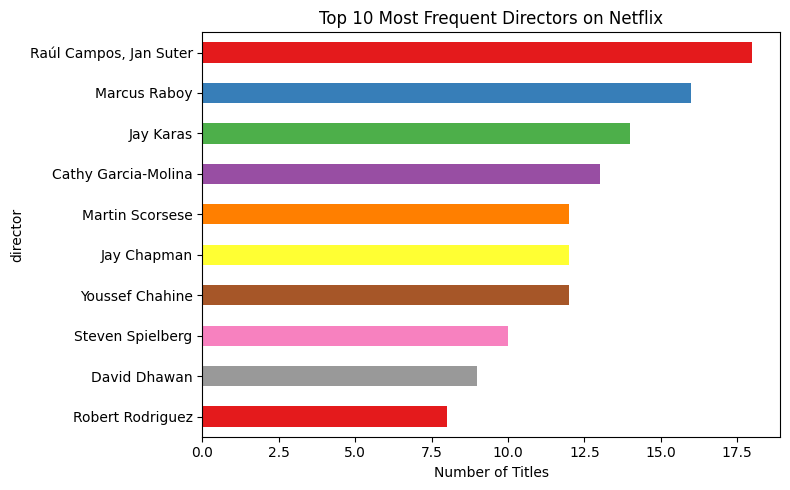

In [19]:
#Univariate Analysis
#Top 10 Directors
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

# Get the "Set1" color palette from Seaborn
colors = sns.color_palette("Set1", n_colors=len(top_directors))

# Plot the bar chart with "Set1" colors
plt.figure(figsize=(8, 5))
top_directors.plot(kind='barh', color=colors)

plt.xlabel('Number of Titles')
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**1. Why did I pick the specific chart?**

A horizontal bar chart is ideal for displaying and comparing the frequency of different categorical items (in this case, directors). It makes it easy to read the director names and compare their counts visually.

**2. What is/are the insight(s) found from the chart?**

Raúl Campos, Jan Suter are the most frequent directors in your dataset.
Marcus Raboy is the second most frequent director.

There's a noticeable drop in frequency after the top two.
Several directors (Jay Karas, Cathy Garcia-Molina, Martin Scorsese, Jay Chapman, Youssef Chahine) have a similar frequency.

Steven Spielberg, David Dhawan, and Robert Rodriguez appear less frequently among the top directors.

The chart highlights directors who have contributed a significant number of titles to the Netflix library.

**3. Will the gained insights help create a positive business impact?**

Yes.

Content Acquisition: Identifying frequent directors can inform decisions about potentially acquiring more content from them or those with similar styles who resonate with Netflix's audience.

Recommendation Systems: Director can be a factor in recommendations, especially for users who have enjoyed content by these frequent directors.

Marketing and Promotion: Highlighting content from well-known or frequently featured directors (like Steven Spielberg, even if lower on this frequency list) can attract viewers.

Understanding Content Strategy: The prevalence of certain directors might reflect past content acquisition strategies and can inform future directions.

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

Potentially, if alone: Over-reliance on a few directors (like Raúl Campos & Jan Suter) could lead to a less diverse content library and might not cater to all user preferences.

Reason: Solely focusing on a small group of creators might limit the variety of storytelling and styles available, potentially alienating users seeking different types of content.

country
United States     2546.0
India              923.0
United Kingdom     396.0
Japan              224.0
South Korea        183.0
dtype: float64


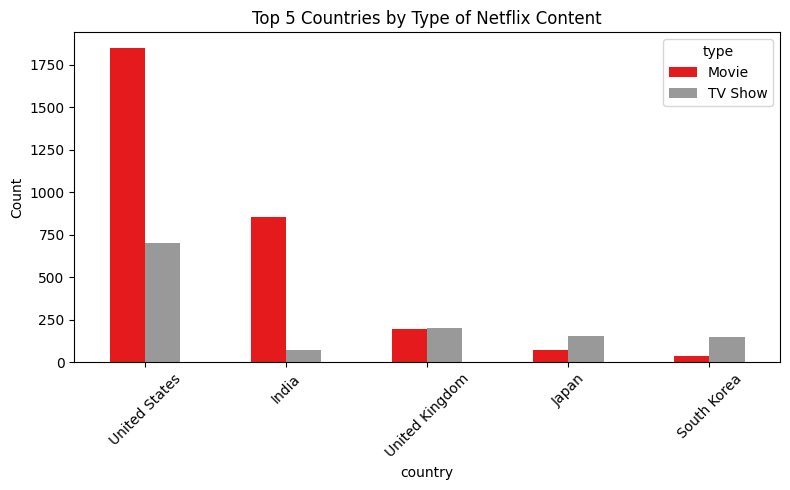

In [20]:
#Bivariate Analysis
#Country based Analysis
# Filter out 'Unknown' country entries
filtered_df = df[df['country'] != 'Unknown']

# Group by country and type (Movie/TV Show), then count
country_type_counts = filtered_df.groupby(['country', 'type'], observed=True).size().unstack().fillna(0)


# Get top 5 countries by total content count
top_5_countries = country_type_counts.sum(axis=1).sort_values(ascending=False).head(5)

print(top_5_countries)

# Plot grouped (non-stacked) bar chart
country_type_counts.loc[top_5_countries.index].plot(kind='bar', figsize=(8,5), colormap='Set1')

# Add labels and title
plt.ylabel('Count')
plt.title('Top 5 Countries by Type of Netflix Content')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



**1. Why did you I the specific chart?**

A grouped bar chart is excellent for comparing two or more categorical variables (in this case, 'Movie' and 'TV Show') across different groups (the top 5 countries). It allows for a direct visual comparison of the number of movies and TV shows produced by each country.

**2. What is/are the insight(s) found from the chart?**

The United States has the highest number of both Movies and TV Shows on Netflix, significantly outstripping other countries.

India has a substantial number of Movies but a much smaller number of TV Shows compared to the US.

The United Kingdom shows a more balanced contribution of Movies and TV Shows compared to India, though still far less than the US.

Japan has a relatively small number of Movies but a more noticeable presence in TV Shows compared to its movie count.
South Korea has a very small number of Movies but a comparable number of TV Shows to Japan.

The US dominates movie production among the top 5, while its lead in TV show production is also significant but less overwhelming compared to movies.



**3. Will the gained insights help create a positive business impact?**

Yes.

Content Acquisition Strategy: Highlights key content-producing regions for both movies and TV shows, informing where Netflix might focus its acquisition efforts.

The strong US presence suggests its importance, while the differing ratios in other countries (e.g., India's movie focus, Japan and South Korea's relative TV show strength) indicate regional content strengths.

International Strategy: Understanding the content output by country is crucial for tailoring content offerings to regional preferences and understanding international content trends.

Partnerships and Collaborations: Identifying major content-producing countries can guide decisions about international partnerships and collaborations.

Marketing: Highlighting content originating from specific popular regions (e.g., South Korean dramas) can attract relevant audiences.

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

Potentially, if alone: Over-reliance on content from a single region (the United States) could lead to a lack of diversity in content and potentially alienate international audiences with different cultural preferences.

Reason: A disproportionately US-centric library might not resonate with viewers in other key markets, potentially leading to lower subscriber growth or higher churn in those regions. Netflix needs to balance its content sources to cater to a global audience.

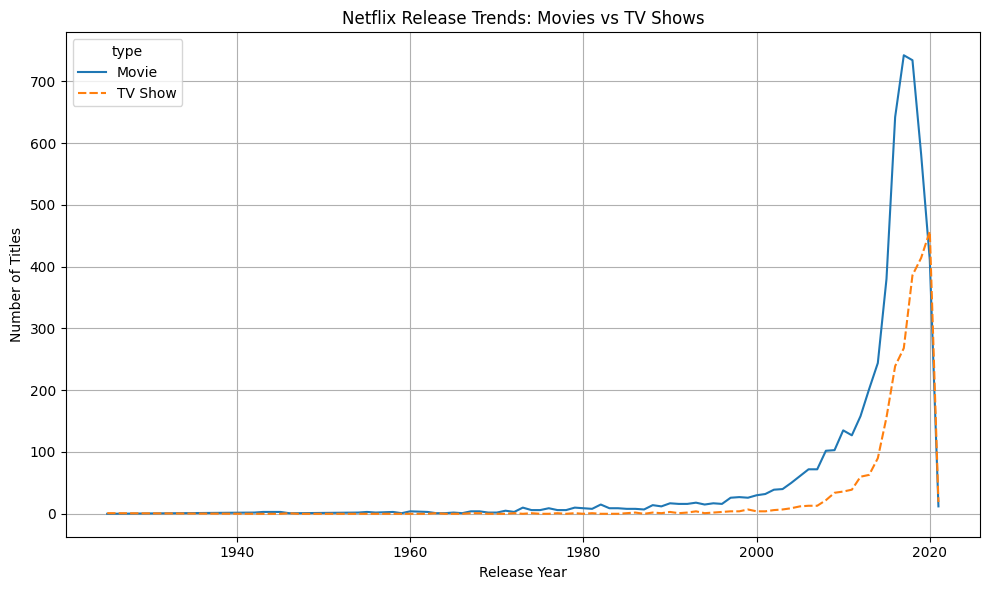

In [21]:
#Bivariate Analysis
#Release Year Trends
# Step 1: Group by release year and type, then count
release_by_type = (
    df.groupby(['release_year', 'type'], observed=True)
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Step 2: Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=release_by_type)

# Step 3: Labels and layout
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Netflix Release Trends: Movies vs TV Shows")
plt.grid(True)
plt.tight_layout()
plt.show()


**1. Why did you I the specific chart?**

A line chart is ideal for visualizing trends over time. In this case, it shows how the number of movies and TV shows released each year (according to your dataset) has evolved, allowing for a comparison of these trends.

**2. What is/are the insight(s) found from the chart?**

The number of both Movies and TV Shows released and added to Netflix has increased significantly in recent years, particularly after 2010.

Movie releases generally outpaced TV show releases in terms of volume until around 2020.

There's a massive surge in movie releases around 2017-2018, followed by a sharp decline.

TV show releases also show a significant upward trend, especially in the years leading up to 2020, and seem to be catching up to movie releases towards the end of the period shown.

The chart suggests a period of rapid content expansion for Netflix in the latter half of the timeline.

There's a noticeable dip in both movie and TV show releases in the last year shown (around 2020/2021), which could be due to data limitations or actual changes in release strategy.

**3. Will the gained insights help create a positive business impact?**

Yes.

Content Acquisition Strategy: Understanding historical release trends can inform future acquisition strategies. The recent surge suggests a focus on rapid content growth, while the later trends might indicate a shift or stabilization.

Production Strategy: If Netflix produces its own content, these trends can highlight the balance between movie and TV show production over time.
Resource Allocation: The significant increase in releases suggests a corresponding increase in resources dedicated to content acquisition and management.

Market Analysis: Comparing these trends with competitor data could provide insights into Netflix's growth strategy relative to the market.

Forecasting: Analyzing these historical trends can help in forecasting future content needs and planning.

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

Potentially, the sharp decline in movie releases towards the end could be a concern if movies are a key driver of subscriber acquisition or retention.

Reason: A significant reduction in the volume of movie releases might lead to a less appealing catalog for users who primarily prefer movies, potentially impacting subscriber growth or increasing churn. However, this needs to be considered alongside the trend in TV show releases and user engagement data for both types of content. The dip could also simply be a temporary fluctuation or a data artifact.

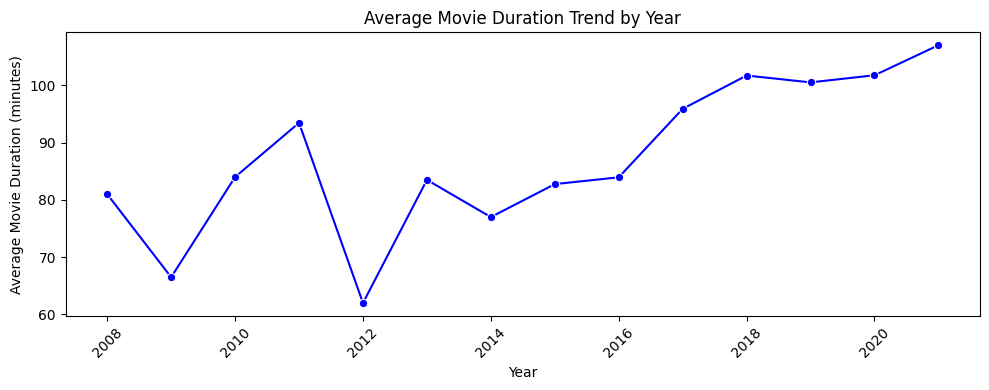

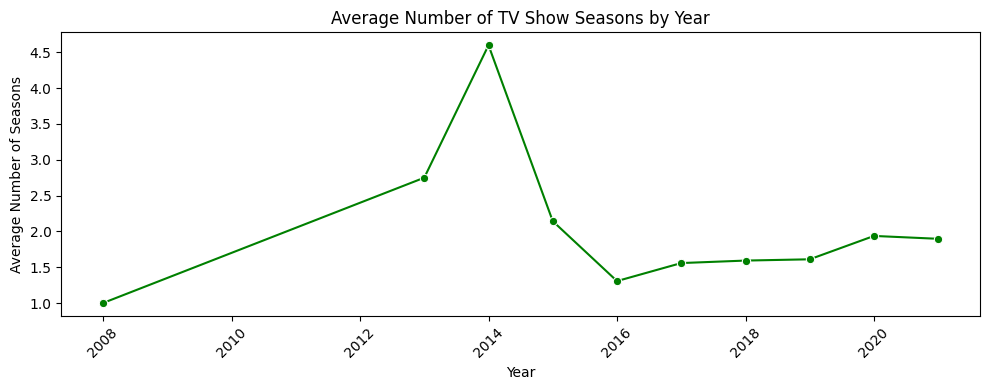

In [22]:
#Duration Trend by Year : Bivariate Analysis

# Extract year
df['year_added'] = df['date_added'].dt.year.astype('Int64')
# Assign 'year_added' to movies_df
# Assign 'year_added' to tv_shows_df safely
movies_df = movies_df.copy()
movies_df.loc[:, 'year_added'] = df['year_added']


# Aggregate movie duration by year
movie_duration_trend = movies_df.groupby('year_added')['movie_duration'].mean().reset_index()

# Line chart for movie duration trends
plt.figure(figsize=(10, 4))
sns.lineplot(data=movie_duration_trend, x='year_added', y='movie_duration', marker='o', color='blue')
plt.title('Average Movie Duration Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Movie Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assign 'year_added' to tv_shows_df
tv_shows_df = tv_shows_df.copy()
tv_shows_df.loc[:, 'year_added'] = df['year_added']
# Aggregate Number of Seasons by year
tv_show_trend = tv_shows_df.groupby('year_added')['num_seasons'].mean().reset_index()

# Line chart for TV show season trends
plt.figure(figsize=(10, 4))
sns.lineplot(data=tv_show_trend, x='year_added', y='num_seasons', marker='o', color='green')
plt.title('Average Number of TV Show Seasons by Year')  # Fixed title
plt.xlabel('Year')
plt.ylabel('Average Number of Seasons')  # Fixed y-axis label
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Movie

**1. Why did I pick the specific chart?**

A line chart is ideal for visualizing trends over time. In this case, it shows how the average duration of movies in your Netflix dataset has changed year by year, allowing for the identification of any patterns or shifts in movie length.

**2. What is/are the insight(s) found from the chart?**

There's significant fluctuation in the average movie duration from 2008 to 2021.

There appears to be a general upward trend in average movie duration, particularly in the later years shown (after around 2015).

Notable dips in average duration occur around 2009 and 2012.
The average movie duration seems to peak around 2021 at approximately 112 minutes.

The average duration in the earlier years (around 2008-2010) was generally lower, hovering around 80-85 minutes.


**3. Will the gained insights help create a positive business impact?**

Yes.

Content Acquisition Strategy: Understanding the trend in average movie duration can inform decisions about the types of movies to acquire. If the trend is towards longer movies, acquiring more of those might align with current content trends on the platform.

Content Production (if applicable): If Netflix produces its own movies, this data can guide decisions about the average length of films to aim for.
User Experience and Planning: Knowing the typical movie lengths can help users plan their viewing time.

Recommendation Algorithms (potentially): Duration could be a subtle factor in recommendations, especially when combined with user viewing habits (e.g., users who prefer shorter content might be less likely to be recommended longer movies if the average duration is increasing).

Content Scheduling and Bandwidth: Longer average durations might have implications for streaming bandwidth and content scheduling on the platform.

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

Potentially, a consistent increase in average movie duration could alienate users who prefer shorter content if the platform doesn't offer enough variety in that range.

Reason: If the average movie length keeps increasing and the availability of shorter movies doesn't keep pace with user demand for them, it could lead to dissatisfaction and potentially churn among users with shorter attention spans or limited viewing time. This needs to be balanced with understanding user preferences for different movie lengths.

#TV SHOWS

**1. Why did I pick the specific chart?**

A line chart is the appropriate choice for visualizing trends over time. Here, it shows how the average number of seasons for TV shows in your Netflix dataset has changed year by year, allowing for the identification of any patterns or shifts in the length of TV series.

**2. What is/are the insight(s) found from the chart?**

The average number of seasons for TV shows has fluctuated significantly between 2008 and 2021.

There's a notable peak in the average number of seasons around 2014, reaching approximately 4.6 seasons.

The average number of seasons was relatively low in the earlier years (around 2008), close to 1 season.

After the peak in 2014, there's a sharp decline until around 2016, where the average drops to about 1.3 seasons.

From 2016 onwards, the average number of seasons shows a gradual increase and then appears to stabilize around 1.9 seasons in the later years (2019-2021).

This suggests a potential shift in Netflix's TV show strategy over time, possibly moving from longer-running series to more limited series or shows with fewer seasons in later years (after the 2014 peak).

3. Will the gained insights help create a positive business impact?

Yes.

Content Acquisition/Production: Informs decisions on TV show length (e.g., focus on shorter runs).

User Engagement/Retention: Helps plan releases and manage expectations for show longevity.

Cost Management: Impacts budget for different series lengths.

Marketing/Promotion: Guides strategies for limited vs. multi-season shows.
Content Scheduling: Aids in planning season release schedules.

4. Are there any insights that lead to negative growth? Justify with a specific reason.

Potentially: Trend towards fewer seasons could displease viewers who prefer longer series.

Reason: Too many short-run shows might cause churn among those who invest in longer narratives. Balance is needed.

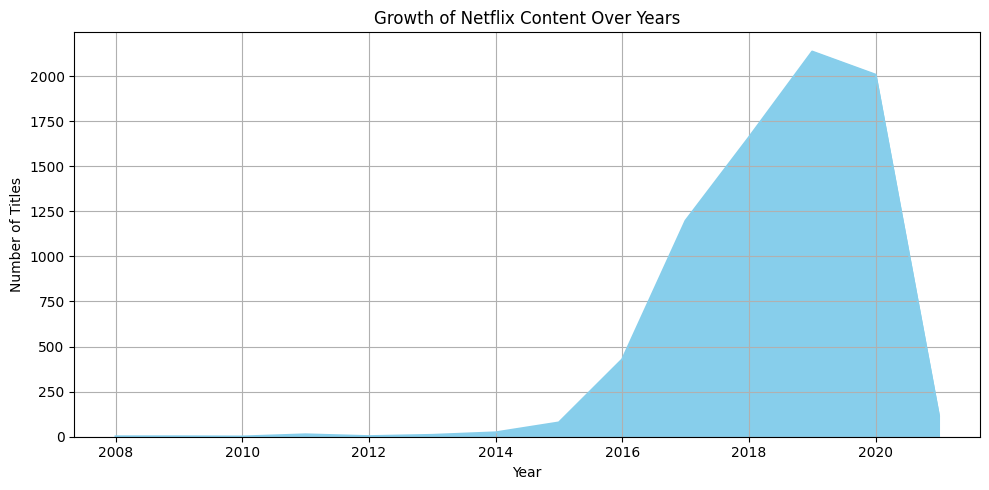

In [26]:
#Time Series Analysis: Univarite Analysis
#Insight: How total content has grown over time.

df['year_added'] = pd.to_datetime(df['date_added']).dt.year
content_by_year = df['year_added'].value_counts().sort_index()
content_by_year.plot(kind='area', figsize=(10,5), color='skyblue')
plt.title("Growth of Netflix Content Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**

An area chart is effective for visualizing the cumulative growth of a quantity over time. In this case, it shows the total number of titles (movies and TV shows combined) added to Netflix over the years, highlighting the overall growth trend.

**2. What is/are the insight(s) found from the chart?**

The growth of Netflix content was relatively slow in the early years (around 2008-2014).
There's a significant acceleration in content growth starting around 2015.
The most substantial growth in the number of titles occurred between approximately 2016 and 2020.
The total number of titles peaked around 2020, reaching over 2000 titles.
There appears to be a decline in the total number of titles added in the last year shown (around 2021).

**3. Will the gained insights help create a positive business impact?**

Yes.
Content Strategy: The chart clearly illustrates the period of rapid content expansion, which likely contributed to subscriber growth. Understanding this growth trajectory can inform future content investment strategies.
Capacity Planning: The significant increase in content volume would have implications for storage, streaming infrastructure, and content management systems.
Market Position: The rapid growth phase likely played a key role in establishing Netflix's market dominance.
Financial Planning: The investment in content during the high-growth years would have been a major financial consideration. The recent decline might signal a shift in investment or acquisition strategy.

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

The apparent decline in the total number of titles added in the last year shown (around 2021) could be a concern if this trend continues. Reason: A sustained decrease in the volume of new content might make the platform less attractive to potential subscribers and could lead to higher churn among existing users who expect a constant influx of fresh material. However, this single data point needs to be considered in the context of content quality, user engagement with existing content, and overall market dynamics. It might also simply reflect a change in data collection or reporting.

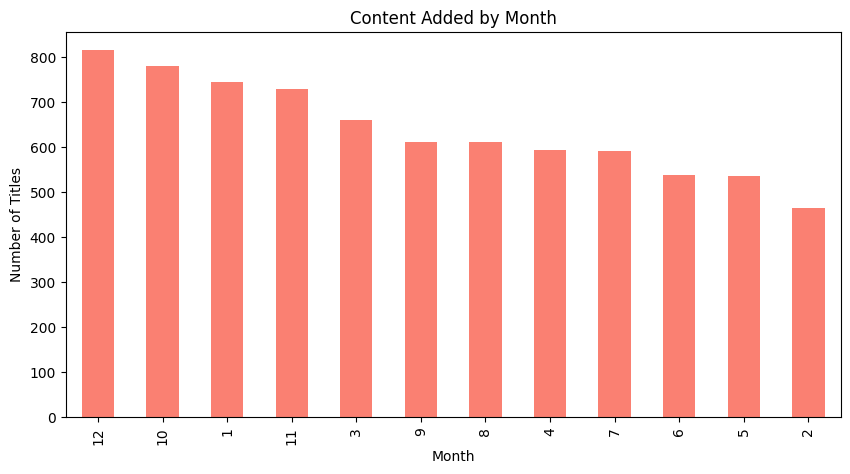

In [27]:
#Content Added Over the Months : Univariate Analysis
#What months does Netflix add the most content?
df['month_added'] = pd.to_datetime(df['date_added']).dt.month.astype('Int64')
# Count occurrences and sort by highest first
monthly_addition = df['month_added'].value_counts().sort_values(ascending=False)

# Plot the bar chart with months in descending order of count
plt.figure(figsize=(10, 6))
monthly_addition.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title("Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()


**1. Why did I pick the specific chart?**

A bar chart is suitable for showing the count of a categorical variable (month) and allows for easy comparison of the number of titles added in each month.

**2. What is/are the insight(s) found from the chart?**

December (12) sees the highest number of content additions.
October (10) and January (1) also have a relatively high number of additions.
There's a general trend of higher content additions in the later months of the year and the beginning of the next.
February (2) has the lowest number of content additions.
Content additions appear to be lower in the middle of the year (around months 4-9) compared to the beginning and end.

**3. Will the gained insights help create a positive business impact?**

Yes.

Content Release Scheduling: Knowing the months with the highest content drops can inform future release scheduling strategies to potentially capitalize on periods of high user engagement or to smooth out releases throughout the year.
Marketing Campaigns: Marketing efforts could be intensified around months with significant content drops to attract and retain subscribers.
Resource Allocation: Understanding peak content addition periods can help in allocating resources for content processing, cataloging, and promotion.

**4. Are there any insights that lead to negative growth? Justify with a specific reason.**

The consistently low content additions in February could lead to lower subscriber acquisition or higher churn during that month if users expect a steady stream of new content. Reason: A noticeable dip in new content during a specific month might make the platform less appealing compared to months with more releases, potentially impacting user satisfaction and growth.

#Conclusion

The Netflix data analysis reveals crucial insights for optimizing content strategy. While movies currently dominate the catalog, TV shows are a rapidly growing segment, demanding balanced investment. Content acquisition should prioritize popular genres (Documentaries, Stand-Up Comedy) but also ensure diversity. Release trends show peak activity at year-end, which necessitates strategic scheduling and marketing. Movie durations are increasing, and TV shows lean towards shorter seasons, impacting user expectations and production costs. The US is a primary content source, but global content is vital for international appeal.

**Key Recommendations for Netflix:**

Balance Content Investment: Increase TV show investment while maintaining movie strength.

Genre Diversification: Cater to popular genres, but explore underrepresented ones.

Optimize Release Strategy: Leverage peak release months for maximum impact.

Adapt to Duration Trends: Consider both shorter and longer formats for movies/shows.

Global Content Strategy: Diversify beyond the US to appeal to international audiences.

Data-Driven Approach: Continuously monitor user data to refine content decisions and maximize growth.

In essence, Netflix must leverage data to dynamically adjust its content strategy, balancing current successes with proactive adaptation to evolving viewer preferences and market trends. This ensures sustained growth and a leading position in the streaming landscape.